# Шаг1: Импорт библиотек

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error as rmse

# Шаг2: Чтение файла и импорт данных

In [26]:
data = pd.read_csv('/workspaces/spbu-python-course/project/titanik#9/titanic.csv') 
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Шаг3: DataCleaning

In [27]:
print(data.isnull().sum())
data = data.dropna() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Шаг4: EDA. Гистограммы возраста пассажиров

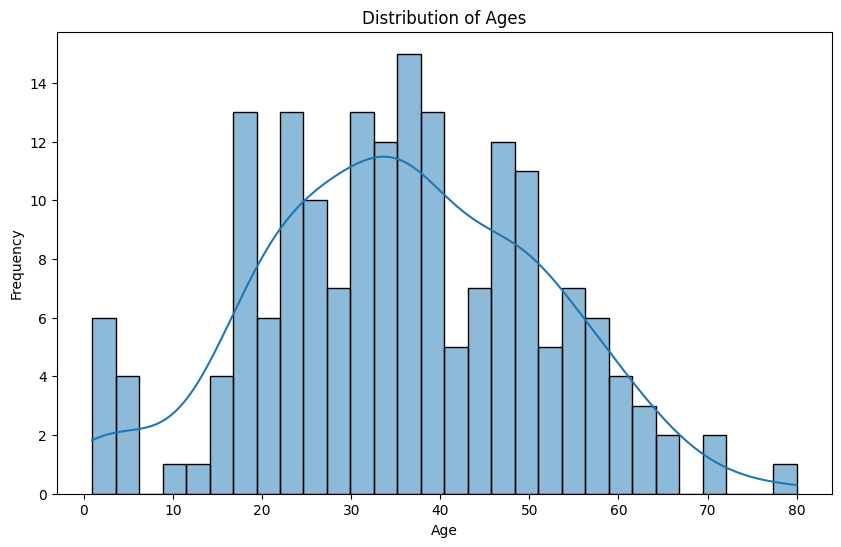

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Шаг5: Соотношение выживаемости по полу

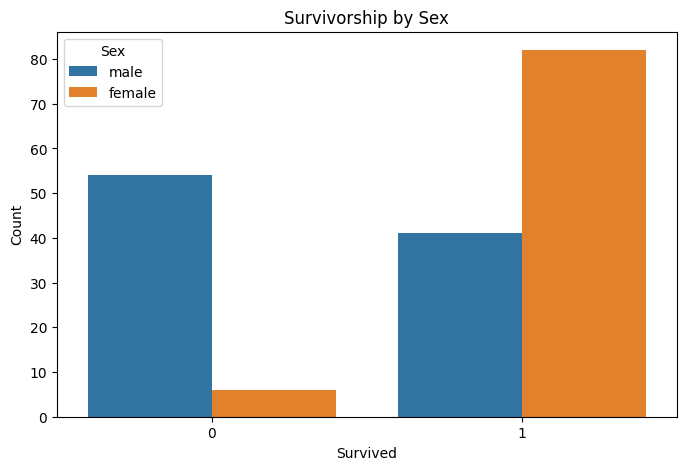

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survivorship by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Шаг6: Преобразование категориальных признаков в числовые

In [30]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Разделение данных на обучающую и тестовую выборки

In [31]:
x = data.drop('Survived', axis=1) 
y = data['Survived']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Обучение модели

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')


Precision: 0.73, Recall: 0.83, Accuracy: 0.70


In [33]:
x_reg = data.drop('Age', axis=1)  
y_reg = data['Age'] 

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(x_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(x_test_reg)

# Шаг7: Оценка модели

In [35]:
rmse_value = rmse(y_test_reg, y_pred_reg)  # RMSE
print(f'Root Mean Squared Error: {rmse_value:.2f}')  # Вывод RMSE

Root Mean Squared Error: 176.22
